# Modelo(s)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/miguel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('../movie reviews/dataset.csv')

In [4]:
df.head()

,Unnamed: 0,text,tag
0,0,films adapted from comic books have had plenty...,1
1,1,"for starters , it was created by alan moore ( ...",1
2,2,to say moore and campbell thoroughly researche...,1
3,3,"the book ( or "" graphic novel , "" if you will ...",1
4,4,"in other words , don't dismiss this film becau...",1


In [5]:
print(df.iloc[0].text, 'TAG: ',df.iloc[0].tag)
print('--')
print(df.iloc[5].text, 'TAG: ', df.iloc[5].tag)
print('--')
print(df.iloc[-13].text, 'TAG: ', df.iloc[-13].tag)

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . TAG:  1
--
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . TAG:  1
--
the brothers literally run into ( or , rather , get run into , as in by car ) richard grieco of _21_jump_street_ fame , and through him they gain entrance into the exclusive roxbury club . TAG:  0


In [6]:
x = df.text
y = df.tag
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [7]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=3000, min_df=5, max_df=0.6, stop_words=stopwords.words('english'))

In [8]:
vec_x_train = vectorizer.fit_transform(x_train)
vec_x_test = vectorizer.transform(x_test)

# Comparación de modelos. 
### Ridge, logistic y SVG

#### Ridge

In [9]:
ridge = RidgeClassifier(tol=1e-2, solver="sparse_cg")
ridge.fit(vec_x_train, y_train)
pred = ridge.predict(vec_x_test)

Precisión : 0.6480222496909765


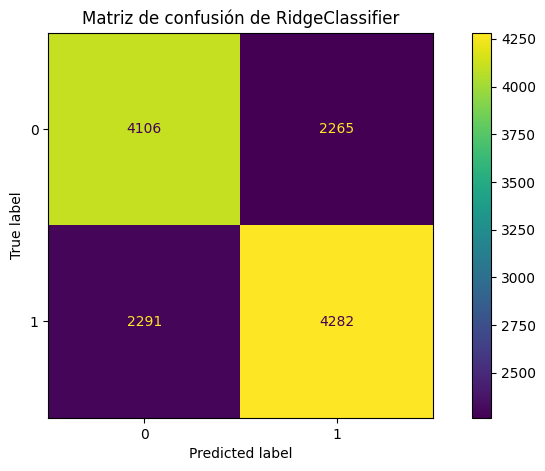

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
_ = ax.set_title(
    f"Matriz de confusión de {ridge.__class__.__name__}"
)
print("Precisión :",metrics.accuracy_score(y_test, pred))

incluyo n-gramas a ver si aumenta la eficacia del modelo´

Precisión : 0.6480222496909765


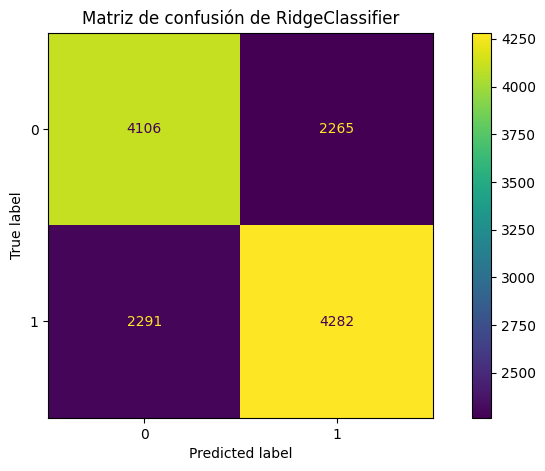

In [11]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),
                             max_features=3000, 
                             min_df=5,
                             max_df=0.6,
                             stop_words=stopwords.words('english'))
vec_x_train = vectorizer.fit_transform(x_train)
vec_x_test = vectorizer.transform(x_test)
ridge = RidgeClassifier(tol=1e-2, solver="sparse_cg")
ridge.fit(vec_x_train, y_train)
pred = ridge.predict(vec_x_test)
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
_ = ax.set_title(
    f"Matriz de confusión de {ridge.__class__.__name__}"
)
print("Precisión :",metrics.accuracy_score(y_test, pred))

#### Random Forest

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:   29.7s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.5s


Precisión del Random Forest: 0.6287
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61      6371
           1       0.63      0.66      0.64      6573

    accuracy                           0.63     12944
   macro avg       0.63      0.63      0.63     12944
weighted avg       0.63      0.63      0.63     12944



[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.6s


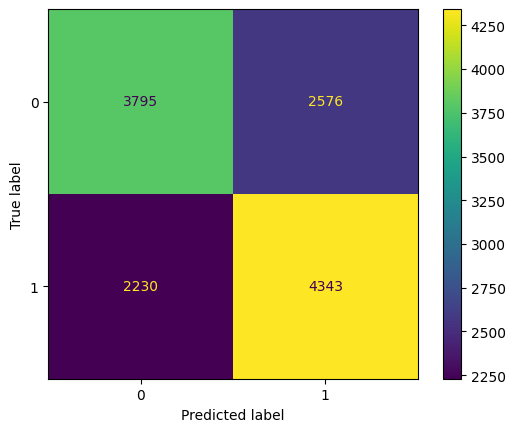

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100,
                                        random_state=42,
                                        verbose=3) 
rf_classifier.fit(vec_x_train, y_train)


y_pred_rf = rf_classifier.predict(vec_x_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del Random Forest: {accuracy_rf:.4f}")

# Reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(rf_classifier, vec_x_test, y_test)
plt.show()

#### Neural network

In [54]:
class modelo_sentimiento(nn.Module):
    def __init__(self, input_dim):
        super(modelo_sentimiento,self).__init__()
        
        # Capa densa 1
        self.fc1 = nn.Linear(input_dim, 256)  # Entrada es la dimensión del vector TF-IDF
        self.relu = nn.ReLU()
        # Capa densa 2
        self.dropout = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

In [62]:
input_dim = vec_x_train.shape[1]
modelo = modelo_sentimiento(input_dim)
criterio = nn.BCELoss()
optimizer = optim.Adam(modelo.parameters(), lr = 0.001, weight_decay=1e-5)

In [63]:
def entrenar_modelo(model, train_loader, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.float())  # Asegurarse de que los inputs sean float
            loss = criterio(outputs.squeeze(), labels.float())
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


In [64]:
def predecir(modelo, inputs):
    modelo.eval()
    with torch.no_grad():
        y_pred_probs = modelo(inputs)
        y_pred = (y_pred_probs.squeeze() >= 0.5).float()
    return y_pred

In [65]:
X_train_tensor = torch.tensor(vec_x_train.toarray()).float()  # Convertimos la matriz dispersa a un array y luego a un tensor
y_train_tensor = torch.tensor(y_train.values).float()  

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

entrenar_modelo(modelo, train_loader, num_epochs=10)

Epoch 1/10, Loss: 0.5911
Epoch 2/10, Loss: 0.5936
Epoch 3/10, Loss: 0.5466
Epoch 4/10, Loss: 0.4950
Epoch 5/10, Loss: 0.3190
Epoch 6/10, Loss: 0.0559
Epoch 7/10, Loss: 0.1004
Epoch 8/10, Loss: 0.0919
Epoch 9/10, Loss: 0.0362
Epoch 10/10, Loss: 0.0670


In [71]:
X_test_tensor = torch.tensor(vec_x_test.toarray()).float()  # Convertimos la matriz dispersa a un array y luego a un tensor
y_test_tensor = torch.tensor(y_test.values).float()  

In [72]:
preds = predecir(modelo,X_test_tensor)

Precisión : 0.6293263288009888


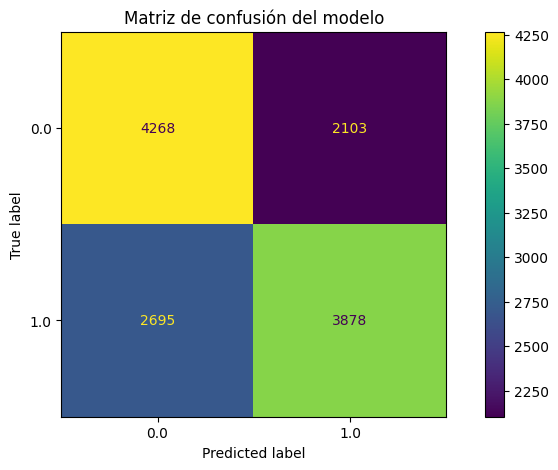

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test_tensor, preds, ax=ax)
_ = ax.set_title(
    f"Matriz de confusión del modelo"
)
print("Precisión :",metrics.accuracy_score(y_test, preds))

#### TODO:

Laburar el input. Limpiar carácteres, conectores, tokenizar a mano y ver si da mejores resultados que usando el tokenizer de sklearn